# DQN on RLGym
### effect of buffer on training
- 

# resources
- [mnih et al., 2015](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)
- [torch DQN tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)
- [blog post](https://towardsdatascience.com/deep-q-learning-for-the-cartpole-44d761085c2f)

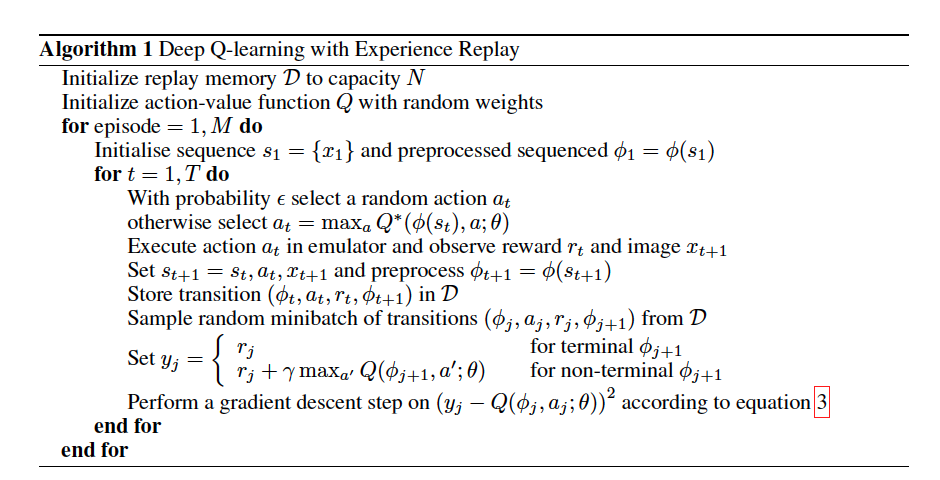

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from utils import *
from collections import namedtuple

import torch as tr
import gym

%load_ext autoreload
%autoreload 2

# effect of buffer
- plot for buffer on vs off, buffer_len

In [2]:
# setup
def experiment(nseeds,neps, buff_mode='online',actpi='argmax',eps=0):
  """
  interactrion logic
  a < agent(s,h)
  s',r  < env (a)
  
  """
  metric = np.zeros((ns,neps))
  for s in range(ns):
    np.random.seed(s)
    tr.manual_seed(s)
    agent = DQN()
    task = Task()
    buffer = Buffer()
    
    # argmax policy
    if actpi=='argmax': eps = 0.9
    for e in range(neps):
        # sample from environment
        episode = task.play_ep(agent.argmax_policy_fn(eps))
        # score on episode data
        metric[s,e] = np.sum(unpack_expL(episode)['reward'])
        # record episode into buffer
        buffer.record(episode)
        # sample training experience from buffer
        expLoD = buffer.sample(mode=buff_mode)
        # update
        exp = unpack_expL(expLoD)
        agent.train(exp)
  return metric



In [3]:
def plt_metric(metric):
  # seeds and mean
  M = metric.mean(0)
  S = metric.std(0)/np.sqrt(ns)
  ax = plt.gca()
  ax.plot(M,zorder=99)
  for smet in metric:
    ax.plot(smet,c='k',lw=.01)

#### effect of buffer
- using random sample of past experience helps stabilize Q learning
-- to control between condition, batchsize=len(last_episode)

In [4]:
# run experiments
ns,ni=20,200
# 
m_online = experiment(ns,ni,buff_mode='online')
m_episodic = experiment(ns,ni,buff_mode='episodic')

(-10.0, 150.0)

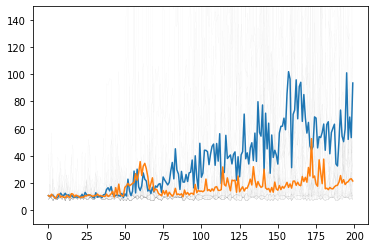

In [5]:
for metric in [m_online,m_episodic]:
  plt_metric(metric)
ax = plt.gca()
ax.set_ylim(-10,150)

In [6]:
metric.shape

(20, 200)

In [7]:
metric

array([[ 8.,  9.,  9., ..., 11., 16., 11.],
       [11., 10., 10., ...,  8.,  9.,  8.],
       [ 8.,  9.,  9., ..., 34., 40., 26.],
       ...,
       [ 8.,  9.,  9., ...,  8., 33.,  8.],
       [ 8.,  9.,  9., ...,  8.,  9.,  8.],
       [ 8.,  9.,  9., ..., 20., 25., 19.]])